In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
smp = pd.read_csv('data/hourly_smp_v1.csv')
smp.head()

,datetime,smp
0,2018-02-01 01:00,116.84
1,2018-02-01 02:00,116.84
2,2018-02-01 03:00,116.84
3,2018-02-01 04:00,116.84
4,2018-02-01 05:00,116.84


In [3]:
time = smp['datetime']
year = []
month = []
day = []
hour_list = []

for time_data in time :
    date = time_data.split(' ')[0]
    hour = time_data.split(' ')[1].split(':')[0]
        
    d = datetime.strptime(date, '%Y-%m-%d')
    year.append(int(d.year))
    month.append(int(d.month))
    day.append(int(d.day))
    
    if hour != '24' :
        hour_list.append(int(hour))
    else :
        hour_list.append(int('00'))

time_dataframe = pd.DataFrame({'year' : year,
                              'month' : month,
                               'day' : day,
                               'hour' : hour_list})

smp = pd.concat([smp, time_dataframe], axis = 1)

In [4]:
smp

,datetime,smp,year,month,day,hour
0,2018-02-01 01:00,116.84,2018,2,1,1
1,2018-02-01 02:00,116.84,2018,2,1,2
2,2018-02-01 03:00,116.84,2018,2,1,3
3,2018-02-01 04:00,116.84,2018,2,1,4
4,2018-02-01 05:00,116.84,2018,2,1,5
...,...,...,...,...,...,...
17515,2020-01-31 20:00,151.66,2020,1,31,20
17516,2020-01-31 21:00,123.85,2020,1,31,21
17517,2020-01-31 22:00,205.89,2020,1,31,22
17518,2020-01-31 23:00,198.24,2020,1,31,23


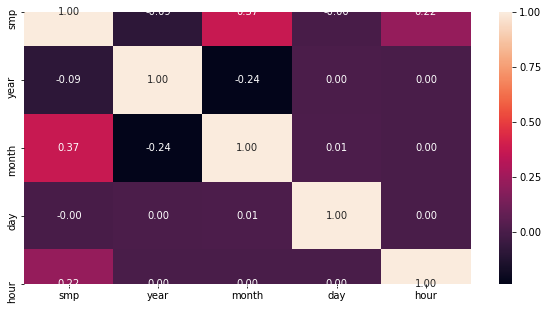

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.heatmap(smp.corr(), ax = ax, annot = True, fmt = '.2f')
plt.show()